State University of New York (SUNY) Campus Locations Map

In [160]:
import sqlite3
imp
ort csv
import pandas as pd

# Local file path
file_path = "/Users/nagalakshminataru/Downloads/City_University_of_New_York__SUNNY__University_Campus_Locations_20231216.csv"

# Parse the CSV data
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    print(header)

    # SQLite database connection
    conn = sqlite3.connect('normalized_database.db')
    cursor = conn.cursor()

    # Create the main university_data table
    create_main_table_query = '''
    CREATE TABLE IF NOT EXISTS university_data (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        campus_name TEXT,
        campus_address TEXT,
        borough TEXT,
        latitude REAL,
        longitude REAL
    );
    '''
    cursor.execute(create_main_table_query)

    # Create the contact_info table
    create_contact_info_table_query = '''
    CREATE TABLE IF NOT EXISTS contact_info (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        university_id INTEGER,
        phone TEXT,
        website TEXT,
        FOREIGN KEY (university_id) REFERENCES university_data(id)
    );
    '''
    cursor.execute(create_contact_info_table_query)

    # Create the degree_info table
    create_degree_info_table_query = '''
    CREATE TABLE IF NOT EXISTS degree_info (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        university_id INTEGER,
        campus_type TEXT,
        campus_size TEXT,
        degree_types_offered TEXT,
        FOREIGN KEY (university_id) REFERENCES university_data(id)
    );
    '''
    cursor.execute(create_degree_info_table_query)

    # Insert data into the tables
    insert_query_university_data = '''
    INSERT INTO university_data
        (campus_name, campus_address, borough, latitude, longitude)
    VALUES (?, ?, ?, ?, ?);
    '''

    insert_query_contact_info = '''
    INSERT INTO contact_info
        (university_id, phone, website)
    VALUES (?, ?, ?);
    '''

    insert_query_degree_info = '''
    INSERT INTO degree_info
        (university_id, campus_type, campus_size, degree_types_offered)
    VALUES (?, ?, ?, ?);
    '''

    for row in csv_reader:
        # Check if the row is not empty
        if row:
            # Check if the row has the expected number of elements
            if len(row) == 10:
                # Insert into the main university_data table
                cursor.execute(insert_query_university_data, (row[0], row[1], row[4], row[2], row[3]))

                # Get the last inserted university_id
                university_id = cursor.lastrowid

                # Insert into the contact_info table
                cursor.execute(insert_query_contact_info, (university_id, row[5], row[6]))

                # Insert into the degree_info table
                cursor.execute(insert_query_degree_info, (university_id, row[7], row[8], row[9]))
            else:
                print(f"Skipping row: {row}")
        else:
            print("Skipping empty row")

    # Commit changes and close the connection
    conn.commit()
    conn.close()

# SQLite database connection
conn = sqlite3.connect('normalized_database.db')

# SQL query to join the tables
query = '''
    SELECT u.*, c.phone, c.website, d.campus_type, d.campus_size, d.degree_types_offered
    FROM university_data u
    INNER JOIN contact_info c ON u.id = c.university_id
    INNER JOIN degree_info d ON u.id = d.university_id;
'''

# Use the read_sql_query method from Pandas to execute the SQL query and retrieve the result into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(df)

# Commit changes and close the connection
conn.commit()
conn.close()



['College or Institution Type', 'Campus', 'Campus Website', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Georeference']
      id         campus_name                          campus_address  \
0    183  Community Colleges  Borough of Manhattan Community College   
1    184  Community Colleges                 Bronx Community College   
2    185  Community Colleges                Hostos Community College   
3    186  Community Colleges          Kingsborough Community College   
4    187  Community Colleges             LaGuardia Community College   
..   ...                 ...                                     ...   
99   308     Senior Colleges                          Hunter College   
100  309     Senior Colleges    John Jay College of Criminal Justice   
101  310     Senior Colleges                          Lehman College   
102  311     Senior Colleges                          Queens College   
103  312     Senior Colleges                            York College   


Visualization Using Machine Leaning

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to read data from the database
def read_data_from_database():
    # Replace this with your actual database connection code
    # For example, using SQLAlchemy:
    # engine = create_engine('your_database_connection_string')
    # df = pd.read_sql_table('your_table_name', engine)
    
    # For demonstration, creating a sample DataFrame
    data = {'campus_type': ['Class A', 'Class B', 'Class A', 'Class B', 'Class A'],
            'campus_size': [1000, 1500, 800, 1200, 900],
            'campus_location': ['A', 'B', 'A', 'B', 'A']}
    df = pd.DataFrame(data)
    return df

# Read data from the database
df = read_data_from_database()

# Create a binary target variable (1 if 'Class A', 0 otherwise)
target_values = (df['campus_type'] == 'Class A').astype(int)
df = pd.concat([df, target_values.rename('binary_campus_type')], axis=1)

# Filter only numeric columns for machine learning
numeric_columns = df.select_dtypes(include=['number']).columns
features = list(numeric_columns)
target = 'binary_campus_type'

X = df[features].dropna()  # Drop rows with missing values
y = df[target].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [163]:

df = pd.read_csv('/Users/nagalakshminataru/Downloads/City_University_of_New_York__SUNNY__University_Campus_Locations_20231216.csv')

# Display basic information about the DataFrame
print("Basic Info:")
print(df.info())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   College or Institution Type  26 non-null     object 
 1   Campus                       26 non-null     object 
 2   Campus Website               26 non-null     object 
 3   Address                      26 non-null     object 
 4   City                         26 non-null     object 
 5   State                        26 non-null     object 
 6   Zip                          26 non-null     object 
 7   Latitude                     26 non-null     float64
 8   Longitude                    26 non-null     float64
 9   Georeference                 26 non-null     object 
dtypes: float64(2), object(8)
memory usage: 2.2+ KB
None

First Few Rows:
   College or Institution Type                                     Campus  \
0           Community Colleges     Bor

In [141]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [171]:
import folium
from folium import Popup
from IPython.display import IFrame

# Create a base map centered around the first campus location
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
map_campus = folium.Map(location=map_center, zoom_start=11)

# Add markers for each campus location
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=Popup(f"<strong>{row['Campus']}</strong><br>{row['Address']}", parse_html=True),
        tooltip=row['Campus']
    ).add_to(map_campus)

# Save the map as an HTML file or display it
map_campus.save('campus_map.html')
# map_campus  # Uncomment this line if you want to display the map in a Jupyter Notebook
# Save the map as an HTML file and display it
map_campus.save('campus_map.html')
IFrame('campus_map.html', width=700, height=500)



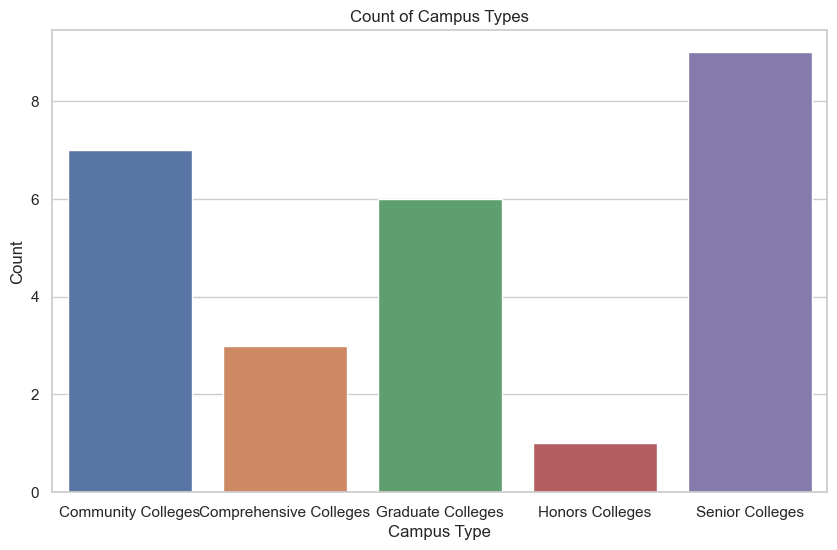

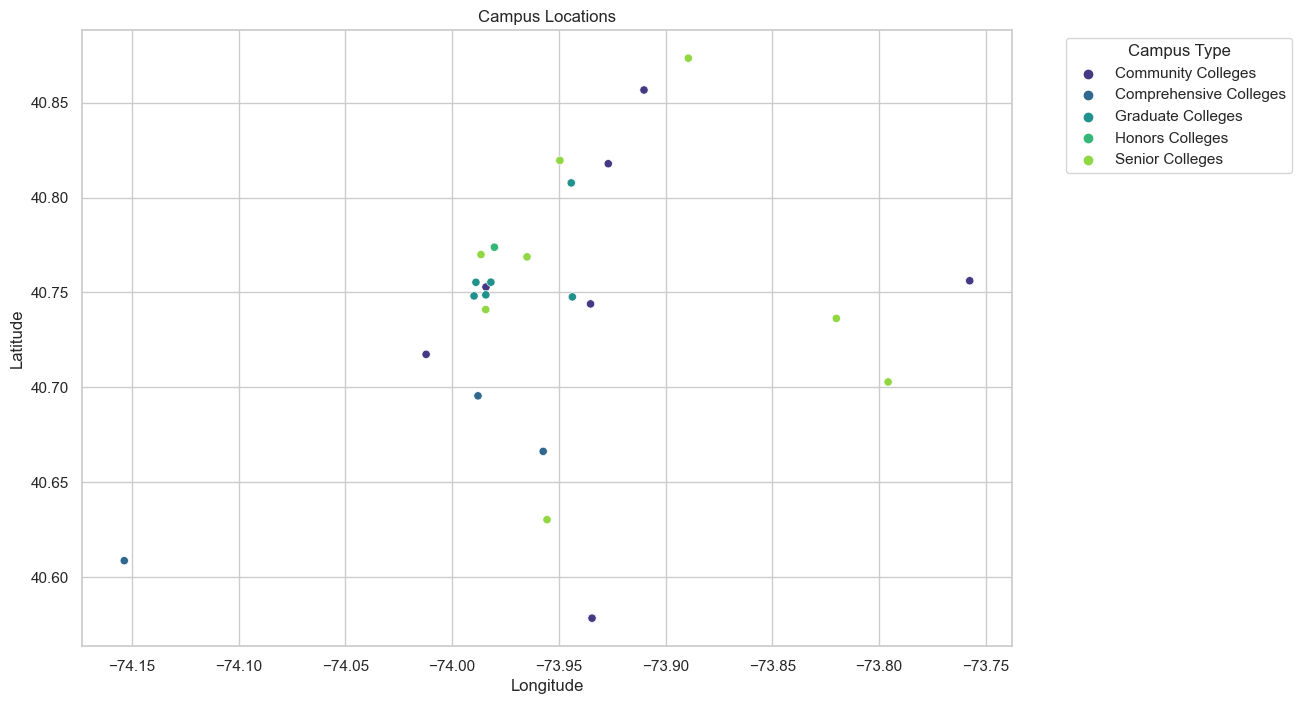

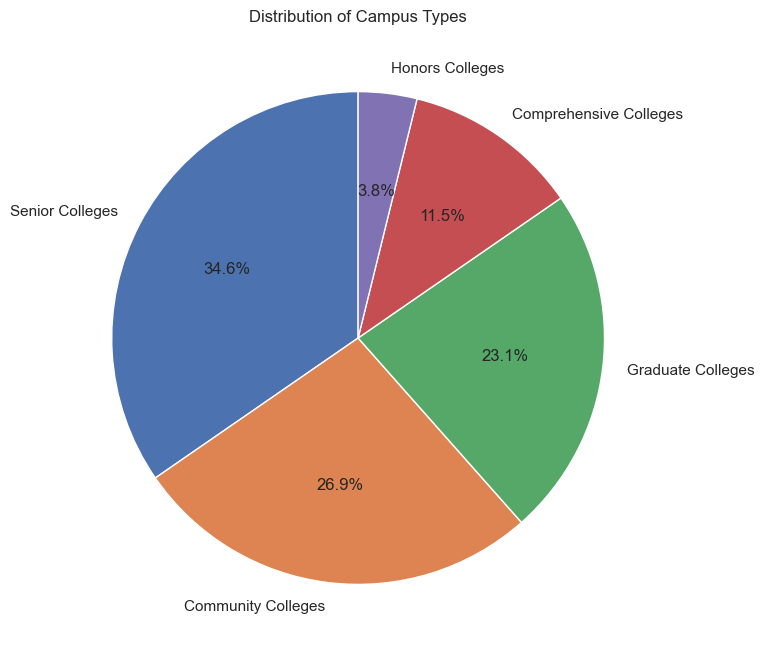

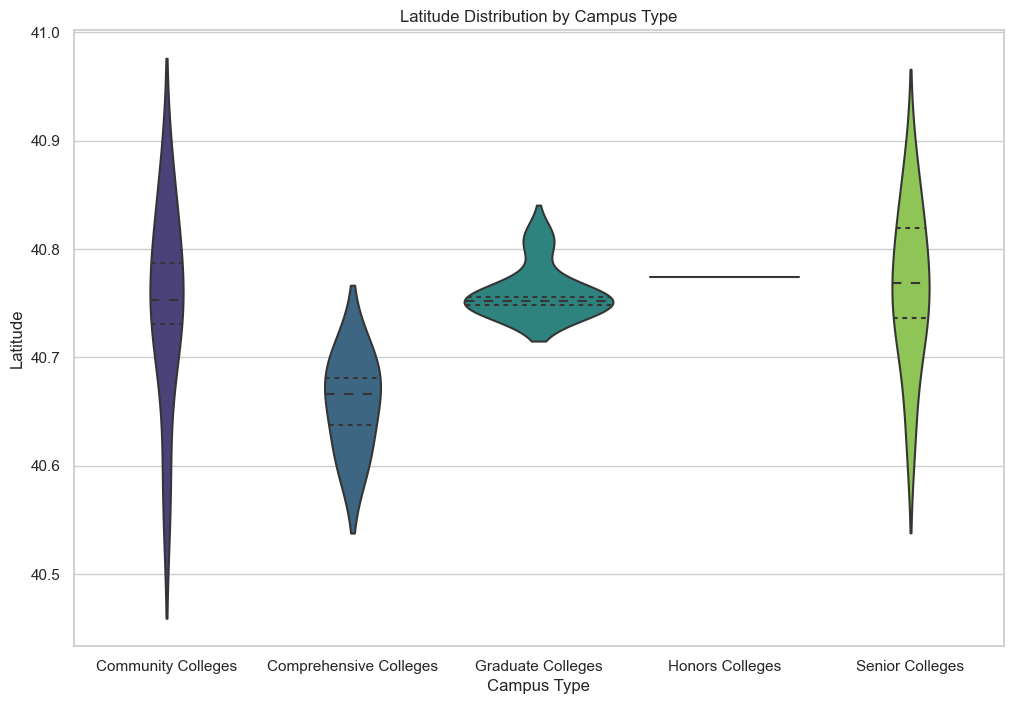

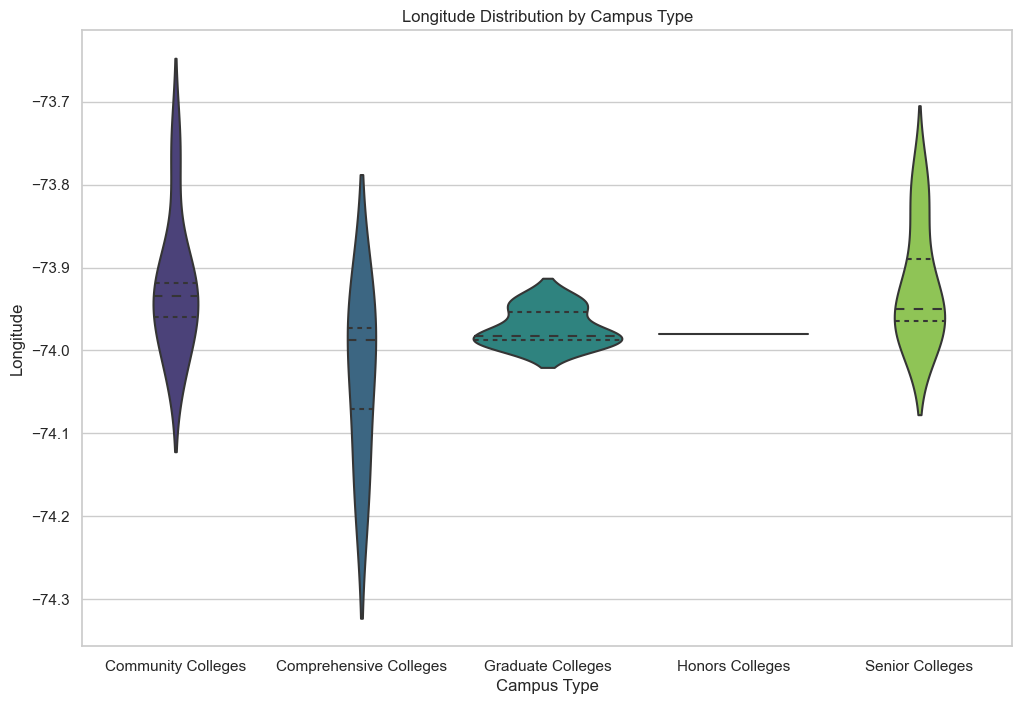

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'College or Institution Type' to categorical
df['College or Institution Type'] = df['College or Institution Type'].astype('category')

# Set the style for plots
sns.set(style="whitegrid")

# Plot 1: Bar plot for the count of campus types
plt.figure(figsize=(10, 6))
sns.countplot(x='College or Institution Type', data=df)
plt.title('Count of Campus Types')
plt.xlabel('Campus Type')
plt.ylabel('Count')
plt.show()

# Plot 2: Scatter plot for latitude and longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='College or Institution Type', data=df, palette='viridis')
plt.title('Campus Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Campus Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 3: Pie chart for the distribution of campus types
plt.figure(figsize=(8, 8))
df['College or Institution Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Campus Types')
plt.ylabel('')
plt.show()

# Plot 4`: Violin plot for Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.violinplot(x='College or Institution Type', y='Latitude', data=df, inner='quartile', palette='viridis')
plt.title('Latitude Distribution by Campus Type')
plt.xlabel('Campus Type')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='College or Institution Type', y='Longitude', data=df, inner='quartile', palette='viridis')
plt.title('Longitude Distribution by Campus Type')
plt.xlabel('Campus Type')
plt.ylabel('Longitude')
plt.show()





